In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import re

In [2]:
def seperate_date_time(x):
    date = pd.to_datetime(x.split(', ')[0], format="%m/%d/%y")
    time = x.split(', ')[1].split(' - ')[0]
    return date, time

In [3]:
def createDf(file_data, dt):
    patterns = {
        '12 Hour':'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24 Hour':'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
    }
    
    data = ' '.join(file_data.read().split('\n'))
    user_message = re.split(patterns[dt], data)[1:]
    date_time = re.findall(patterns[dt], data)
    
    df = pd.DataFrame({'user_message': user_message, 'date_time': date_time})
    df[['date','time']] = df['date_time'].apply(lambda x: seperate_date_time(x)).to_list()
    users = []
    messages = []
    for message in df['user_message']:
        entry = re.split('([\w\W]+?):\s', message)
        if entry[1:]:
            users.append(entry[1])
            messages.append(entry[2])
        else:
            users.append('group_notification')
            messages.append(entry[0])

    df['user'] = users
    df['message'] = messages
    df.drop(columns=['user_message', 'date_time'], inplace=True)
    return df

In [4]:
f = open('WhatsApp Chat with Say GT (original) 12 hour format.txt', 'r', encoding='utf-8')
df = createDf(f, '12 Hour')

In [92]:
f = open('WhatsApp Chat with Say GT (original) 24 hour format.txt', 'r', encoding='utf-8')
df = pd.DataFrame(createDf(f, '24 Hour'))

In [6]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['month_num'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['time'].apply(lambda x: x.split(':')[0])
df['minute'] = df['time'].apply(lambda x: (x.split(':')[1]).split(' ')[0])
if '12 Hour':
    df['meridian'] = df['time'].apply(lambda x: (x.split(':')[1]).split(' ')[1])
df.head()

,date,time,user,message,year,month,month_num,day,day_name,hour,minute,meridian
0,2022-05-09,3:01 PM,group_notification,Messages and calls are end-to-end encrypted. N...,2022,May,5,9,Monday,3,01,PM
1,2022-05-26,7:21 PM,Clg Divyansh,Robotics ke notes,2022,May,5,26,Thursday,7,21,PM
2,2022-05-26,7:44 PM,Clg Kushagra Ahire,MST me jo numerical aaye the uske solution bhe...,2022,May,5,26,Thursday,7,44,PM
3,2022-05-26,7:55 PM,Clg Abbas Amjhera,<Media omitted>,2022,May,5,26,Thursday,7,55,PM
4,2022-05-26,8:05 PM,+91 6239 413 783,Bhai notes bhej do yrr koi 🙏🏻,2022,May,5,26,Thursday,8,05,PM


In [7]:
df1 = df.copy()
df1['message_count'] = [1] * df1.shape[0]
df1 = df1.groupby('date').sum().reset_index()
df1.head()

,date,year,month_num,day,message_count
0,2022-05-09,2022,5,9,1
1,2022-05-26,32352,80,416,16
2,2022-05-27,28308,70,378,14
3,2022-05-28,10110,25,140,5
4,2022-05-29,16176,40,232,8


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Messages sent per day over a time period')

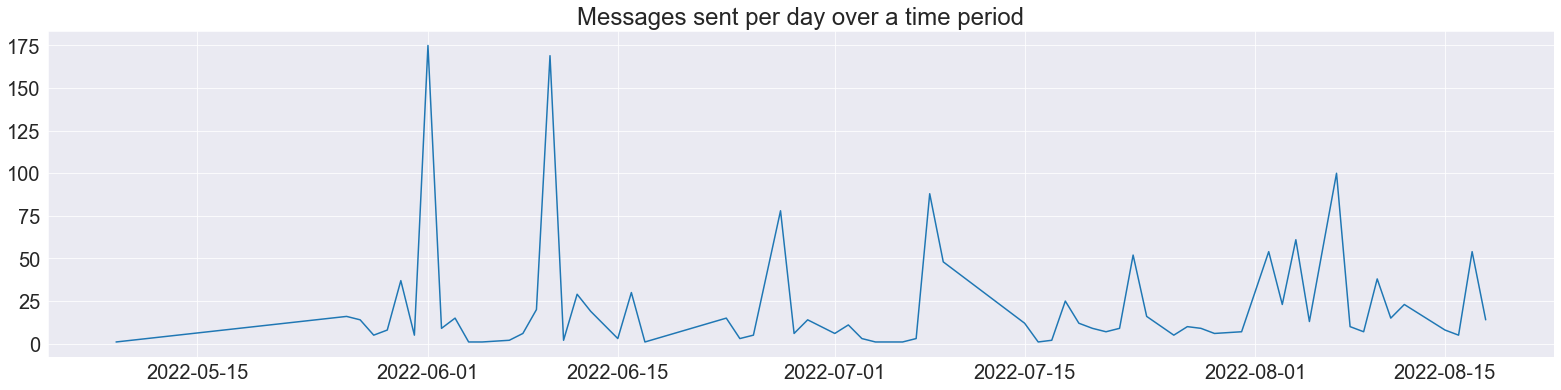

In [12]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27,6)
plt.plot(df1.date, df1.message_count)
plt.title('Messages sent per day over a time period')